# Рекомендация тарифов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div>
    <font color='green'>Колличество 0 и 1 в столбце is_ultra и их пропорция</font>
</div>

In [4]:
print('Колличество 0 и 1 в столбце is_ultra')
display(data['is_ultra'].value_counts())
proportion = data['is_ultra'].value_counts()[0]/data['is_ultra'].value_counts()[1]
print('Во сколько раз 0 больше 1 в столбце is_ultra:', proportion)

Колличество 0 и 1 в столбце is_ultra


0    2229
1     985
Name: is_ultra, dtype: int64

Во сколько раз 0 больше 1 в столбце is_ultra: 2.2629441624365483


In [3]:
data_train, data_test = train_test_split(data, train_size=0.6, random_state=12345, stratify=data['is_ultra'])
data_test, data_val = train_test_split(data_test, train_size=0.5, random_state=12345, stratify=data_test['is_ultra'])

In [6]:
print(data_train.shape)
print(data_test.shape)
print(data_val.shape)
print('Доли данных от всех данных в обучающей выборке, тестовой и валлидационной :', \
      data_train.shape[0]/data.shape[0], data_test.shape[0]/data.shape[0], data_val.shape[0]/data.shape[0])

(1928, 5)
(643, 5)
(643, 5)
Доли данных от всех данных в обучающей выборке, тестовой и валлидационной : 0.5998755444928439 0.2000622277535781 0.2000622277535781


In [7]:
print('Проверка пропорции в обучающей выборке :')
print(data_train['is_ultra'].value_counts())
print()
print(data_train['is_ultra'].value_counts()[0]/data_train['is_ultra'].value_counts()[1])
print()
print('Проверка пропорции в тестовой выборке :')
print(data_test['is_ultra'].value_counts())
print()
print(data_test['is_ultra'].value_counts()[0]/data_test['is_ultra'].value_counts()[1])
print()
print('Проверка пропорции в выллидационной выборке :')
print(data_val['is_ultra'].value_counts())
print()
print(data_val['is_ultra'].value_counts()[0]/data_val['is_ultra'].value_counts()[1])


Проверка пропорции в обучающей выборке :
0    1337
1     591
Name: is_ultra, dtype: int64

2.2622673434856178

Проверка пропорции в тестовой выборке :
0    446
1    197
Name: is_ultra, dtype: int64

2.263959390862944

Проверка пропорции в выллидационной выборке :
0    446
1    197
Name: is_ultra, dtype: int64

2.263959390862944


In [4]:
features = data_train.drop('is_ultra', axis=1)
target = data_train['is_ultra']

features_test = data_test.drop('is_ultra', axis=1)
target_test = data_test['is_ultra']

features_val = data_val.drop('is_ultra', axis=1)
target_val = data_val['is_ultra']


<div>
    <font color='green'>Модель решающего дерева</font>
    </div>

max_depth лучшей модели: 5
Accuracy лучшей модели: 0.8118195956454122


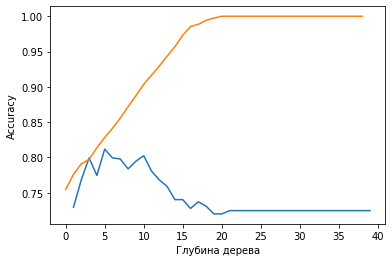

In [6]:
best_model_dt = None
best_result_dt = 0
result_dt_plot = []
result_dt_train_plot = []
for depth_dt in range(1, 40):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth_dt) 
    model_dt.fit(features, target) 
    predictions = model_dt.predict(features_val) 
    predictions_train = model_dt.predict(features)
    result_dt = accuracy_score(target_val, predictions) 
    result_dt_train = accuracy_score(target, predictions_train)
    result_dt_plot.append(result_dt)
    result_dt_train_plot.append(result_dt_train)
    if result_dt > best_result_dt:
        best_model_dt = model_dt
        best_result_dt = result_dt
        best_depth_dt = depth_dt

print('max_depth лучшей модели:', best_depth_dt)
print("Accuracy лучшей модели:", best_result_dt)

plt.plot(range(1,40), result_dt_plot, result_dt_train_plot)
plt.xlabel('Глубина дерева')
plt.ylabel('Accuracy')
plt.show()

<div>
    <font color='green'>Модель случайного леса</font>
    </div>

In [10]:
best_model_rf = None
best_result_rf = 0
for est_rf in tqdm(range(1, 11)):
    for depth_rf in range(1, 40):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est_rf, max_depth=depth_rf)  
        model_rf.fit(features, target)
        result_rf = model_rf.score(features_val, target_val) 
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_est_rf = est_rf
            best_depth_rf = depth_rf

        
print('Колличество деревьев лучшей модели:', best_est_rf)
print('max_depth лучшей модели:', best_depth_rf)
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)

100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

Колличество деревьев лучшей модели: 3
max_depth лучшей модели: 6
Accuracy наилучшей модели на валидационной выборке: 0.8149300155520995


<div>
    <font color='green'>
        Модель логистической регрессии</font>
    </div>


In [11]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

model_lr.fit(features, target)

result_lr = model_lr.score(features_val, target_val)

print('Accuracy лучшей модели:', result_lr)

Accuracy лучшей модели: 0.7465007776049767


<div>
    <font color='green'>Моделью с наилучшей Accuracy получилась модель Случайного леса с параметрами: количество деревьев - 3 и глубины деревьев - 6</font>
</div>

In [12]:
model = RandomForestClassifier(random_state=12345, n_estimators=3, max_depth=6) 

model.fit(features, target)

predictions = model.predict(features_test)

result = accuracy_score(target_test, predictions)

print('Accuracy лучшей модели на тестовой выборке:', result)

Accuracy лучшей модели на тестовой выборке: 0.7947122861586314


In [13]:
data_train_val = pd.concat([data_train, data_val])

features = data_train_val.drop('is_ultra', axis=1)
target = data_train_val['is_ultra']

model = RandomForestClassifier(random_state=12345, n_estimators=3, max_depth=6)

model.fit(features, target)

predictions = model.predict(features_test)

result = accuracy_score(target_test, predictions)

print('Accuracy лучшей модели на тестовой выборке после обучения на суммарных данных валлидации и обучения:', result)

Accuracy лучшей модели на тестовой выборке после обучения на суммарных данных валлидации и обучения: 0.80248833592535


<div>
    <font color='green'>Вывод:</font></div>
    
Изучены данные. Данные оказались без пропусков и с допустимыми типами.\
\
Для данной задачи рассматривались три модели для задачи классификации: решающее дерево, случайный лес и логистическая регрессия.\
\
Данные разбились на три выборки: обучающую, тестовую и валлидационную. Данные разбивались в соотношении 3:1:1 соответственно. Сохранялась пропорция классов в целевом столбце. Отношение 0 к 1 в каждой выборке примерно одинаково и равно 2.26.\
\
На валидационной выборке для случая решающего дерева в диапазоне значений глубины от 1 до 40 самой точной моделью стала модель с глубиной равной 5. С точностью - 0.8118195956454122. Для случая случайного леса диапазон колличества деревьев брался от 1 до 10, глубина деревьев - от 1 до 40. Лучшей моделью оказалась модель с 3 деревьями, глубиной - 6 и точностью 0.8149300155520995. Для случая с логистической регрессией точность модели оказалась равной 0.7465007776049767.\
\
На валидационной выборке лучшей по качеству оказалась модель Случайного леса с параметрами:random_state=12345, n_estimators=3, max_depth=6. Accuracy этой модели на валидационной выборке равно 0.8149300155520995. На тестовой выборке Accuracy получилось ниже и равным 0.7947122861586314.\
\
Если обучить модель с подобранными гиперпараметрами на обучающей выборке+валлидационной выборке, то Accuracy на тестовой выборке становится лучше и равной 0.80248833592535.